# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [242]:
# Puedes incluir más librerías, de ser necesario:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
from google.colab import drive
drive.mount('/content/drive')

import os
DIR = "/content/drive/MyDrive/Maestria/Segundo Trimestre/IAyAA/Actividad 5/"
os.chdir(DIR)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

El metodo de "Curvas de aprendizaje" es una herramienta visual usada para diagnosticar el comportamiento y rendimiento de un modelo durante su entrenamiento, su principal función es ayudar a los cientificos a prevenir el subentrenamiento y sobrentrenamiento.

Estos gráficos representan el rendimiento del modelo con los conjuntos de entrenamiento y validación, evaluando el tiempo o el score (accuracy) en base al número de muestras

**Eje horizontal**: En este podemos ubicar el número de muestras en el set de entrenmiento, las iteraciones o la complejidad del modelo

**Eje vertical**: Podemos ubicar tanto el accuracy como el tiempo del score para analizar la complejidad.


#### Interpretación de las curvas

**Subentrenamiento:** Cuando el modelo es demasiado simple y es incapaz de realizar predicciones acertadas, presenta un bajo valor en métricas de accuracy y respecto al error presenta valor muy altos.

**Sobreentramiento:** Cuando el modelo se vuelve tan complejo que predice los valores exactos del conjunto en lugar de crear una generalización, es decir solo esta entrado para predecir los valores en ese conjunto por lo que el accuracy se vuelve 1 pero en el conjunto de validación el accuracy es demasiado inferior

**Balanceado** Las curvas de entrenamiento y validación se encuentran ligeramente separadas alcanzando valores altos en accuracy o valores bajos en el error

La siguiente imagen ilustra estos casos

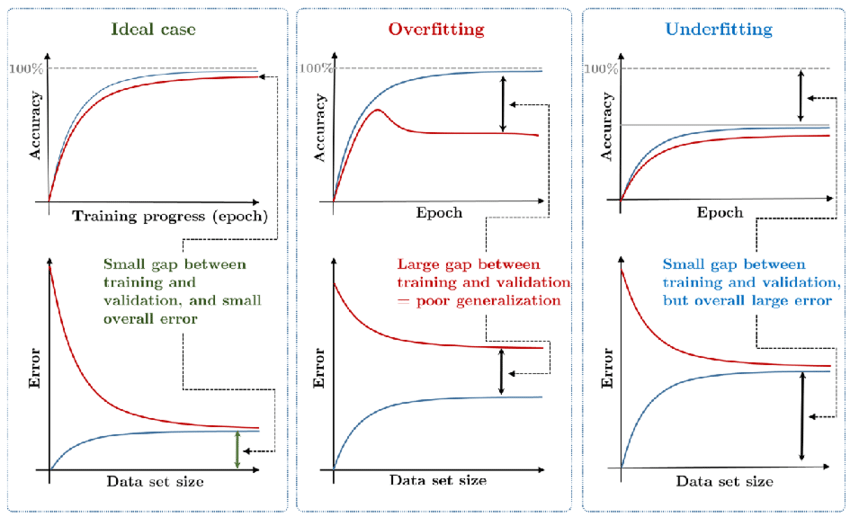



### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

El artículo se centra en analizar un dataset de posts realizados  en facebook sobre una marca reconocida de cosmeticos, la intención de ello es predecir el impacto que tienen las publicaciones en la marca en base a características extraidas de los posts, de esta manera sería posible determinar que tipo de posts, momento del día, mes y semana es el ideal para generar un mayor beneficio para la empresa.

El estudio explora la relación entre los hallazgos e impacto de las varibles en la construcción de la marca, puesto que actualmente anunciarse en redes sociales es una de la tecnicas de marketing más utilizadas, proponen como estas métricas contribuyen al reconocimiento y propagación de la marca

### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

**Variables de entrada**

*   Category: Caracteristica del contenido manual (3 tipos)
    1. Action (Ofertas especiales y concursos)
    2. Producto (Anuncio directo, contenido explicito de la marca)
    3. Inspiración (Contenido no explicito de la marca)
*   Page total likes: Número total de gente que ha dado like a la página de la compañía
*   Type: Tipo de contenido (4 tipos)
    1. Link
    2. Photo
    3. Status
    4. Video
*   Post month: Mes en el que la publicación fue realizada (Enero, Febrero...Diciembre
*   Post hour: La hora a la que la publicación fue hecha (0,1,2,3...23)
*   Post weekday: Día de la semana de la publicación (Domingo, Lunes... Sabado)
*   Paid: Si la compañia pago a facebook por anunciar su post (Si, NO)

**Variable de salida**

*  Lifetime post consumers: El número de gente que dío click en cualquier lugar del post

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [243]:
# Cargamos los datos:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [244]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [245]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [246]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


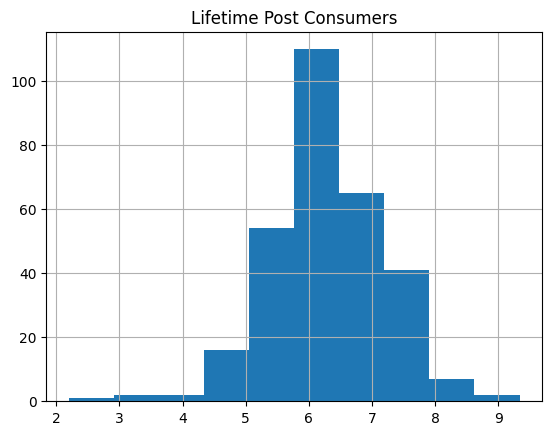

In [247]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [248]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [249]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [250]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


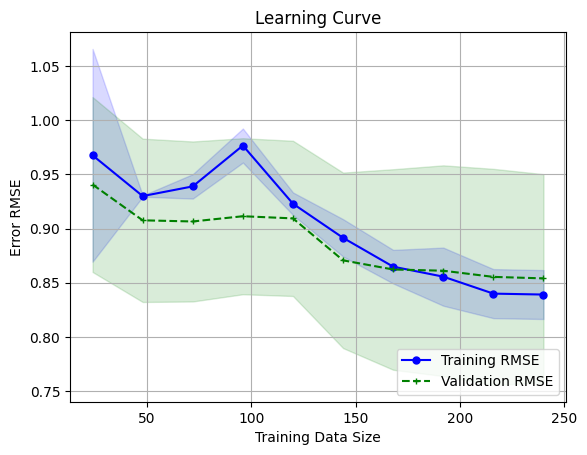

In [251]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators= 400, # Num arboles
                                        max_depth= 150,
                                        min_samples_split=5,
                                        min_samples_leaf=45,
                                        random_state=42)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++
## Se realizo el cambio en esta sección para volver el codigo función
## y evitar el DRY (Don't Repeat Yourself)
def plot_curves(model):

  mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', model)])

  train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                          X=XtrainT,
                                                          y=np.ravel(ytrainlog),
                                                          cv=5,
                                                          train_sizes= np.linspace(0.1, 1.0, 10),
                                                          scoring= 'neg_mean_squared_error',  # error MSE
                                                          n_jobs=-1)

  # Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
  # como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
  # sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

  rmse_train_scores = np.sqrt(-train_scores)
  rmse_val_scores = np.sqrt(-val_scores)

  train_mean = np.mean(rmse_train_scores, axis=1)
  train_std = np.std(rmse_train_scores, axis=1)
  val_mean = np.mean(rmse_val_scores, axis=1)
  val_std = np.std(rmse_val_scores, axis=1)


  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

  plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

  plt.title('Learning Curve')
  plt.xlabel('Training Data Size')
  plt.ylabel('Error RMSE')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

plot_curves(elmodelo_RF)

In [252]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators= 400, # Num arboles
                                        max_depth= 150,
                                        min_samples_split=5,
                                        min_samples_leaf=45,
                                        random_state=42)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++
def RMSE_analysis(model):
  mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', model)])
  mipipe.fit(Xtrain, np.ravel(ytrainlog))
  yhattest_RF = mipipe.predict(Xtest)

  print('Error RSME(Test) : %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

RMSE_analysis(elmodelo_RF)

Error RSME(Test) : 0.894


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

#### XGBoost

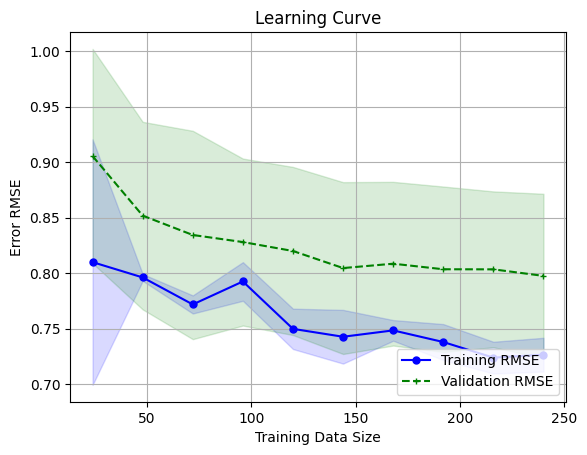

Error RSME(Test) : 0.782


In [253]:
elmodelo_XG = XGBRegressor(booster= 'gbtree',
                               n_estimators=200,   # A medida que se aumente "n_estimators", se debe disminuir el "learning_rate", de manera general.
                               max_depth= 6,             # 1,3, 6,
                               learning_rate=0.003,   #  0.3, 0.000001, 0.01, 100,     # participación o peso de cada árbol desde el inicio.
                               subsample=0.4,        # 1.0,  0.9, 0.8, ... 0.5    # submuestreo con respecto a los renglones para evitar overfitting.
                               random_state=42,
                               n_jobs=-1)

plot_curves(elmodelo_XG)
RMSE_analysis(elmodelo_XG)

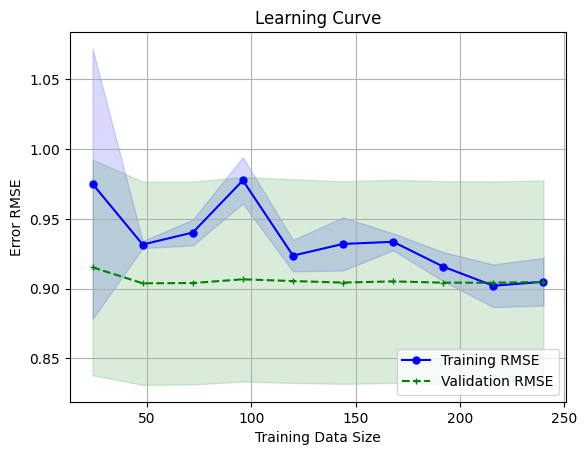

Error RSME(Test) : 0.912


In [254]:
elmodelo_SVM = SVR(kernel='rbf',
                     C = 0.001,
                     degree = 3,      # 1.0, 0.00001, 1000           # inversamente proporcional a la constante de regularización L2.
                     gamma= 'scale',           # scale,  0.005
                     epsilon = 0.003
                   )

plot_curves(elmodelo_SVM)
RMSE_analysis(elmodelo_SVM)

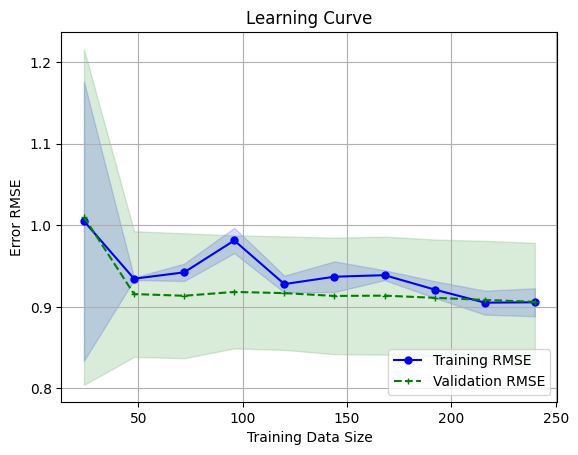

Error RSME(Test) : 0.913


In [255]:
elmodelo_MLP = MLPRegressor(hidden_layer_sizes=(15,15),     # 100,  6, 24, 30, (15,15), (50,50)
                               activation='logistic',
                               solver='adam',
                               max_iter=1000,                  # 200,
                               alpha=0.00001,               # término de regularización L2.
                               learning_rate='constant',
                               learning_rate_init=0.001,
                               random_state=42)

plot_curves(elmodelo_MLP)
RMSE_analysis(elmodelo_MLP)

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

La actividad estuvo centrada en lograr el entendimiento de las curvas de aprendizaje, mediante un caso práctico, que fue el análisis de las características de un posts para determinar su impacto en la marca de la empresa que lo realizó.

Se comenzo realizando el análisis exploratorio de los datos, basandonos en la información del articulo moro et al,. en la cual se realizo el análisis del mismo problema, así como la divisón en los conjuntos de entrenamiento, validación y prueba para evitar el data leakage

 Posteriormente se realizó el preprocesamiento de los datos donde se llevaron a cabo transformaciones para variables númericas y codificaciones para variables ordinales para así estandarizar y normzalizar los datos, de esta manera los algoritmos de machine learning brindan resultados más acertados.

 Ahora con los datos listos el objetivo es crear modelos de regresión con las técnicas de

 *  Random Forest
 *  Extreme Gradient Boost XGBoost
 *  Máquina de Vector Soporte SVM
 *  Red Neuronal Perceptrón Multicapa MLP

El principal enfoque es lograr el mejor desempeño de los modelos lo que implica que no haya sub o sobre entrenamiento para ello se analizarán las curvas de aprendizaje y el RMSE en base a estos datos podemos concluir lo siguiente:

El modelo que considero mejor es el de Extreme Gradient XGBoost el cual obtuvo el menor valor en RMSE de 0.78 este modelo a pesar de buscar diversas configuraciones para mejorarlo sigue presentando un sobre entrenamiento en base a las curvas donde se presenta una varianza alta entre los conjuntos, sigue habiendo un error significativo por lo cual el modelo aun no es lo suficientemente complejo para predecir los datos, sin embargo dentro de todos los modelos analizados es el que mejor desempeño tendría siendo hasta un 20% mas preciso.

El segundo mejor modelo obtenido fue el de RandomForest el cual se encuentra sub-entrenado con una baja varianza entre los datos de Entrenamiento y validación pero con un alto sesgo en el error llegando a obtener un RMSE de 0.89 un valor alto lo que nos dice que el modelo aun es demasiado simple siendo una de las posibles razones los pocos datos con los que el modelo cuenta para entrenar.





### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**